In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [49]:
df = pd.read_excel('//content/amazon.xlsx')
df['number'] = round(df['number'])
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [50]:
df['date'].unique()

array(['1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
       '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
       '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
       '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01'],
      dtype=object)

In [51]:
df.drop('date', inplace = True, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 201.8+ KB


In [52]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [53]:
df['month'].replace({'Janeiro' : 'Jan', 'Fevereiro' : 'Feb', 'Marзo' : 'March',
                    'Abril' : 'Apr', 'Maio' : 'May', 'Junho' : 'June', 
                     'Julho' : 'July', 'Agosto' : 'Aug', 'Setembro' : 'Sep',
                     'Outubro' : 'Oct', 'Novembro' : 'Nov', 'Dezembro' : 'Dec'
                    }, inplace = True)
df.head()

,year,state,month,number
0,1998,Acre,Jan,0.0
1,1999,Acre,Jan,0.0
2,2000,Acre,Jan,0.0
3,2001,Acre,Jan,0.0
4,2002,Acre,Jan,0.0


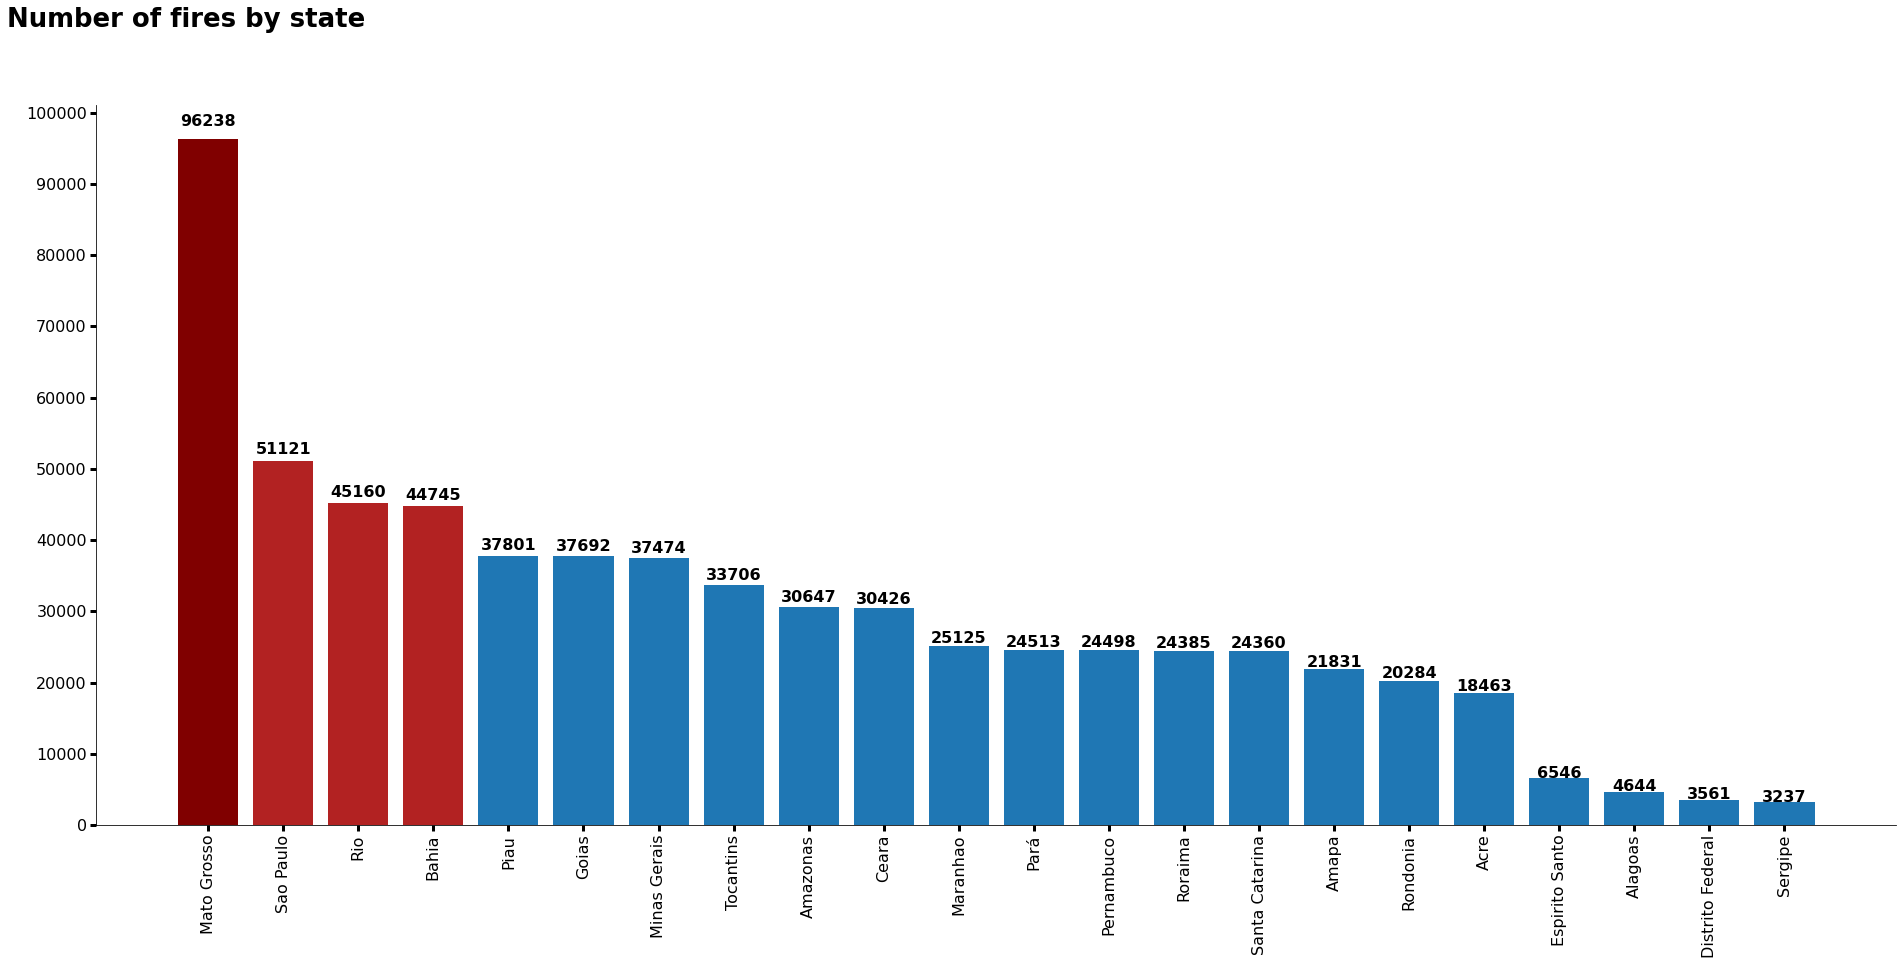

In [54]:
latitude={
    'Acre':-9.02,'Alagoas':-9.57,'Amapa':02.05,'Amazonas':-5.00,'Bahia':-12.00,'Ceara':-5.00,
          
          'Distrito Federal':-15.45,'Espirito Santo':-20.00,'Goias':-15.55,'Maranhao':-5.00,'Mato Grosso':-14.00
          
          ,'Minas Gerais':-18.50,'Parб':-3.20,'Paraiba':-7.00,'Pernambuco':-8.00,'Piau':-7.00,'Rio':-22.90,
          
          'Rondonia':-11.00,'Roraima':-2.00,'Santa Catarina':-27.25,'Sao Paulo':-23.32,'Sergipe':-10.30,
         
         'Tocantins':-10.00
         }


longitude={
    'Acre':-70.8120,'Alagoas':-36.7820,'Amapa':-50.50,'Amazonas':-65.00,'Bahia':-42.00,'Ceara':-40.00,
    
    'Distrito Federal':-47.45,'Espirito Santo':-40.45,'Goias':-50.10,'Maranhao':-46.00,'Mato Grosso':-55.00,
    
    'Minas Gerais':-46.00,'Parб':-52.00,'Paraiba':-36.00,'Pernambuco':-37.00,'Piau':-73.00, 'Rio':-43.17,
    
    'Rondonia':-63.00,'Roraima':-61.30,'Santa Catarina':-48.30,'Sao Paulo':-46.37,'Sergipe':-37.30,
    
    'Tocantins':-48.00
}
df['latitude'] = df['state'].map(latitude)
df['longitude'] = df['state'].map(longitude)

# calculations
group_by_state = df \
    .groupby('state', as_index = False) \
    .agg({'number' : 'sum'}) \
    .sort_values('number', ascending = False) \
    .reset_index() \
    .drop('index', axis = 1)

# viz
fig = plt.figure(figsize = (25, 10))
ax = fig.add_axes([0, 0, 1, 1])

# chart
ax.bar(x = group_by_state['state'][:1], height = group_by_state['number'][:1], color = 'maroon')
ax.bar(x = group_by_state['state'][2:5], height = group_by_state['number'][2:5], color = 'firebrick')
ax.bar(x = group_by_state['state'][5:], height = group_by_state['number'][5:])

# axis
sns.despine()

# annotate
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center', color = 'black', fontsize = 16, fontweight = 'bold') 

# ticks
plt.yticks(range(0, 100001, 10000))
plt.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)
plt.xticks(rotation = 90)

# title
plt.title('Number of fires by state', x = 0.05, y = 1.1, color = 'black', fontsize = 26, fontweight = 'bold')

plt.show()

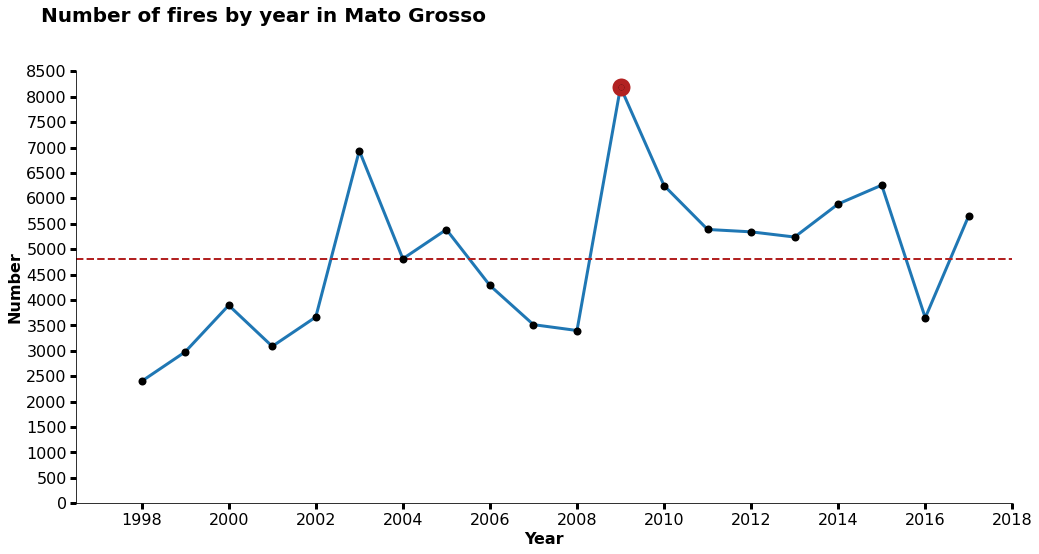

In [55]:
# calculations
m_g = df \
    .query("state == 'Mato Grosso'")
m_g_by_year = m_g \
    .groupby('year', as_index = False) \
    .agg({'number' : 'sum'}) \
    .reset_index() \
    .drop('index', axis = 1)

# viz

fig = plt.figure(figsize = (13, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.lineplot(x = m_g_by_year['year'], y = m_g_by_year['number'], lw = 3)
plt.scatter(x = m_g_by_year['year'], y = m_g_by_year['number'], color = 'black', zorder = 3, lw = 2)
plt.scatter(x = m_g_by_year['year'][11] , y = m_g_by_year['number'][11], color = 'firebrick', zorder = 3, lw = 12)
plt.axhline(y = m_g_by_year['number'].mean(), color = 'firebrick', ls = '--', lw = 2)

# ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.set_xlim(1996.5, 2018)
plt.yticks(range(0, 8501, 500))
plt.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)

# axis
sns.despine()

# labels
plt.xlabel('Year', color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number', color = 'black', fontsize = 16, fontweight = 'bold')

# title
plt.title('Number of fires by year in Mato Grosso', x = 0.20, y = 1.1, color = 'black', fontsize = 20, fontweight = 'bold')


plt.show()

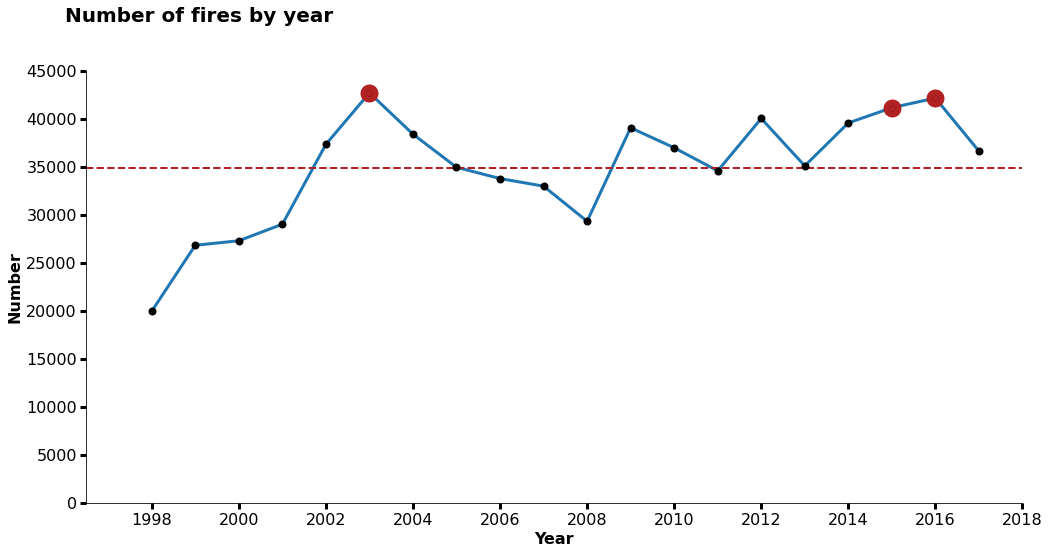

In [56]:
# calculations
group_by_year = df \
    .groupby('year', as_index = False) \
    .agg({'number' : 'sum'}) \
    .reset_index() \
    .drop('index', axis = 1)

# viz
fig = plt.figure(figsize = (13, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.lineplot(x = group_by_year['year'], y = group_by_year['number'], lw = 3)
plt.scatter(x = group_by_year['year'] , y = group_by_year['number'], color = 'black', zorder = 3, lw = 2)
plt.scatter(x = group_by_year['year'][5] , y = group_by_year['number'][5], color = 'firebrick', zorder = 3, lw = 12)
plt.scatter(x = group_by_year['year'][17] , y = group_by_year['number'][17], color = 'firebrick', zorder = 3, lw = 12)
plt.scatter(x = group_by_year['year'][18] , y = group_by_year['number'][18], color = 'firebrick', zorder = 3, lw = 12)
plt.axhline(y = group_by_year['number'].mean(), color = 'firebrick', ls = '--', lw = 2)

# ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.set_xlim(1996.5, 2018)
plt.yticks(range(0, 45001, 5000))
plt.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)

# axis
sns.despine()

# labels
plt.xlabel('Year', color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number', color = 'black', fontsize = 16, fontweight = 'bold')

# title
plt.title('Number of fires by year', x = 0.12, y = 1.1, color = 'black', fontsize = 20, fontweight = 'bold')


plt.show()


In [57]:
# calculations
by_state_2003 = df \
    .query('year == 2003') \
    .groupby('state', as_index = False) \
    .agg({'number' : 'sum'}) \
    .sort_values('number', ascending = False)
by_state_2003['latitude'] = by_state_2003['state'].map(latitude)
by_state_2003['longitude'] = by_state_2003['state'].map(longitude)

# viz
fig = px.scatter_geo(data_frame= by_state_2003, scope='south america',lat = 'latitude',lon = 'longitude',
                     size= 'number' , color = 'state', projection= 'hammer', hover_name = 'state')
fig.update_layout(title = dict(
    text='Fires in 2003 by state',
    x=0.2,
    font=dict(
        color='black',
        size=24)))
fig.show()

In [58]:
# calculations
by_state_2015 = df \
    .query('year == 2015') \
    .groupby('state', as_index = False) \
    .agg({'number' : 'sum'}) \
    .sort_values('number', ascending = False)
by_state_2015['latitude'] = by_state_2015['state'].map(latitude)
by_state_2015['longitude'] = by_state_2015['state'].map(longitude)

# viz
fig = px.scatter_geo(data_frame= by_state_2015, scope='south america',lat = 'latitude',lon = 'longitude',
                     size= 'number' , color = 'state', projection= 'hammer', hover_name = 'state')
fig.update_layout(title = dict(
    text='Fires in 2015 by state',
    x=0.2,
    font=dict(
        color='black',
        size=24)))
fig.show()

In [59]:
# calculations
by_state_2016 = df \
    .query('year == 2016') \
    .groupby('state', as_index = False) \
    .agg({'number' : 'sum'}) \
    .sort_values('number', ascending = False)
by_state_2016['latitude'] = by_state_2016['state'].map(latitude)
by_state_2016['longitude'] = by_state_2016['state'].map(longitude)

# viz
fig = px.scatter_geo(data_frame= by_state_2016, scope='south america',lat = 'latitude',lon = 'longitude',
                     size= 'number' , color = 'state', projection= 'hammer', hover_name = 'state')
fig.update_layout(title = dict(
    text='Fires in 2016 by state',
    x=0.2,
    font=dict(
        color='black',
        size=24)))
fig.show()

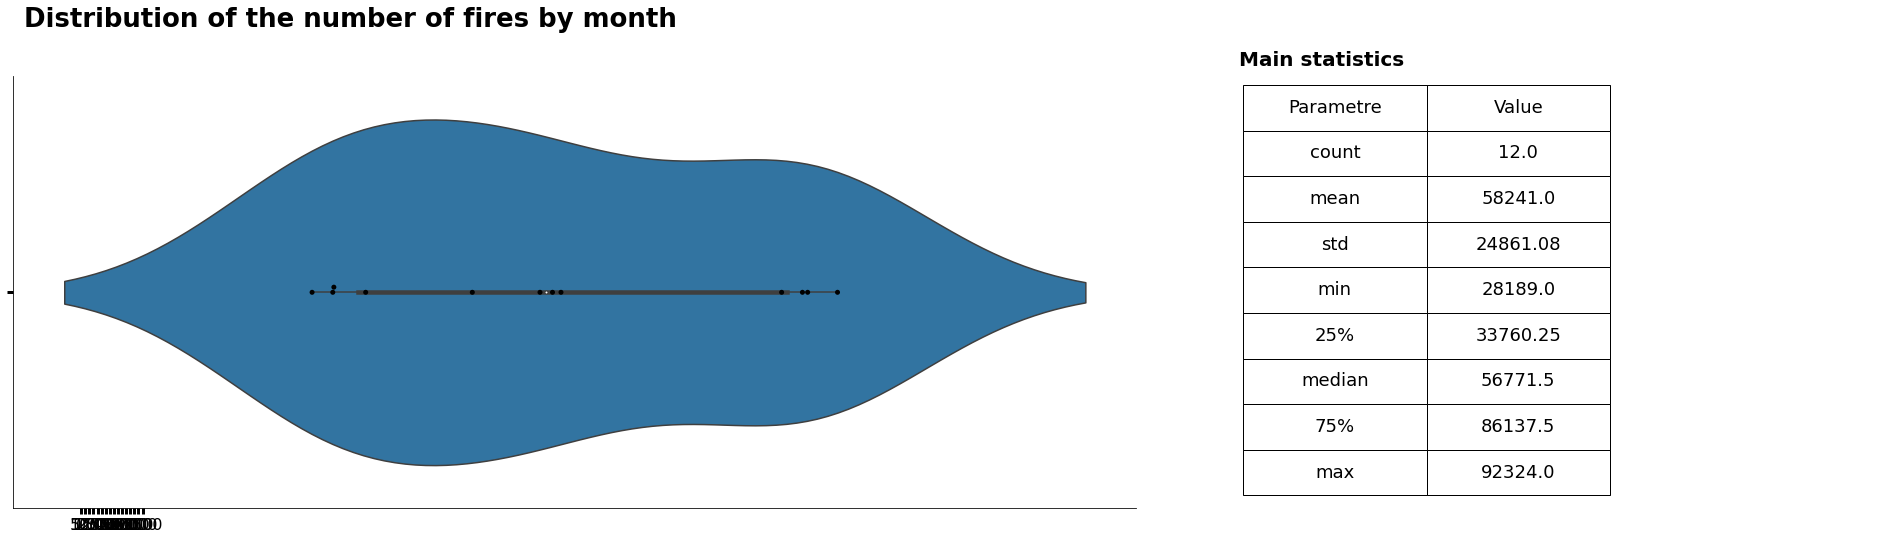

In [62]:
# calculations
group_by_month_year = df \
    .groupby(df['month'], as_index = False) \
    .agg({'number' : 'sum'})

# viz
fig = plt.figure(figsize = (13, 6))
ax1 = fig.add_axes([0, 0, 1.2, 1])
ax2 = fig.add_axes([1.3, 0, 0.7, 1])

# chart

# figure
sns.violinplot(x = group_by_month_year['number'], ax = ax1)
sns.swarmplot(x = group_by_month_year['number'], ax = ax1, color = 'black')

# axis
sns.despine()

# ticks
ax1.set_xticks(range(0, 7501, 500))
ax2.set_xticks(range(0, 7001, 1000))
ax1.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)

# labels
ax1.set_xlabel('')
ax2.set_xlabel('')

# title
ax1.set_title('Distribution of the number of fires by month', x = 0.3, y = 1.1, color = 'black', fontsize = 26, fontweight = 'bold')

# table

# axis
ax2.axis('off')

# calculations
stats_list = []
for x in group_by_month_year['number'].describe():
    stats_list.append(round(x, 2))
names = ['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max']
df_stats = pd.DataFrame({'Parametre' : names, 'Value' : stats_list})
list_ = []
for n in range(len(df_stats)):
    x = df_stats.loc[n,:]
    list_.append(x)

# colors for table
color_list=[['white', 'white']]

# table
table=ax2.table(cellColours=color_list*8, cellText = list_, cellLoc ='center', loc ='upper left', colWidths=[0.1, 0.1],
                  colLabels=df_stats.columns,colColours=['white', 'white'])          

# fontsize
table.auto_set_font_size(False) 
table.set_fontsize(18)

# skale
table.scale(2.8, 3.8) 

# text
ax2.text(100, 1.025, 'Main statistics', color='black', fontsize = 20, fontweight='bold')

plt.show()

In [64]:
# calculations
august_2006 = df \
    .query("month == 'Aug' and year == 2006")
group_by_state_august_2006 = august_2006 \
    .groupby('state', as_index = False) \
    .agg({'number' : 'sum'})\
    .sort_values('number', ascending = False).reset_index() \
    .drop('index', axis = 1)
group_by_state_august_2006['latitude'] = group_by_state_august_2006['state'].map(latitude)
group_by_state_august_2006['longitude'] = group_by_state_august_2006['state'].map(longitude)

# viz
fig = px.scatter_geo(data_frame= group_by_state_august_2006, scope='south america',lat = 'latitude',lon = 'longitude',
                     size= 'number' , color = 'state', projection= 'hammer', hover_name = 'state')
fig.update_layout(title = dict(
    text='Fires in August 2006 by state',
    x=0.2,
    font=dict(
        color='black',
        size=24)))
fig.show()

In [65]:
# calculations
july_2016 = df \
    .query("month == 'July' and year == 2016")
group_by_state_july_2016 = july_2016 \
    .groupby('state', as_index = False) \
    .agg({'number' : 'sum'})\
    .sort_values('number', ascending = False).reset_index() \
    .drop('index', axis = 1)
group_by_state_july_2016['latitude'] = group_by_state_july_2016['state'].map(latitude)
group_by_state_july_2016['longitude'] = group_by_state_july_2016['state'].map(longitude)

# viz
fig = px.scatter_geo(data_frame= group_by_state_july_2016, scope='south america',lat = 'latitude',lon = 'longitude',
                     size= 'number' , color = 'state', projection= 'hammer',
                     hover_name = 'state')
fig.update_layout(title = dict(
    text='Fires in July 2016 by state',
    x=0.2,
    font=dict(
        color='black',
        size=24)))
fig.show()

In [67]:
# calculations
july_2002 = df \
    .query("month == 'July' and year == 2002")
group_by_state_july_2002 = july_2002 \
    .groupby('state', as_index = False) \
    .agg({'number' : 'sum'})\
    .sort_values('number', ascending = False).reset_index() \
    .drop('index', axis = 1)
group_by_state_july_2002['latitude'] = group_by_state_july_2002['state'].map(latitude)
group_by_state_july_2002['longitude'] = group_by_state_july_2002['state'].map(longitude)

# viz
fig = px.scatter_geo(data_frame= group_by_state_july_2002, scope='south america',lat = 'latitude',lon = 'longitude',
                     size= 'number' , color = 'state', projection= 'hammer',
                     hover_name = 'state')
fig.update_layout(title = dict(
    text='Fires in July 2002 by state',
    x=0.2,
    font=dict(
        color='black',
        size=24)))
fig.show()


In [68]:
# calculations
august_2000 = df \
    .query("month == 'Aug' and year == 2000")
group_by_state_august_2000 = august_2000 \
    .groupby('state', as_index = False) \
    .agg({'number' : 'sum'})\
    .sort_values('number', ascending = False).reset_index() \
    .drop('index', axis = 1)
group_by_state_august_2000['latitude'] = group_by_state_july_2002['state'].map(latitude)
group_by_state_august_2000['longitude'] = group_by_state_july_2002['state'].map(longitude)

# viz
fig = px.scatter_geo(data_frame= group_by_state_august_2000, scope='south america',lat = 'latitude',lon = 'longitude',
                     size= 'number' , color = 'state', projection= 'hammer',
                     hover_name = 'state')
fig.update_layout(title = dict(
    text='Fires in August 2000 by state',
    x=0.2,
    font=dict(
        color='black',
        size=24)))
fig.show()

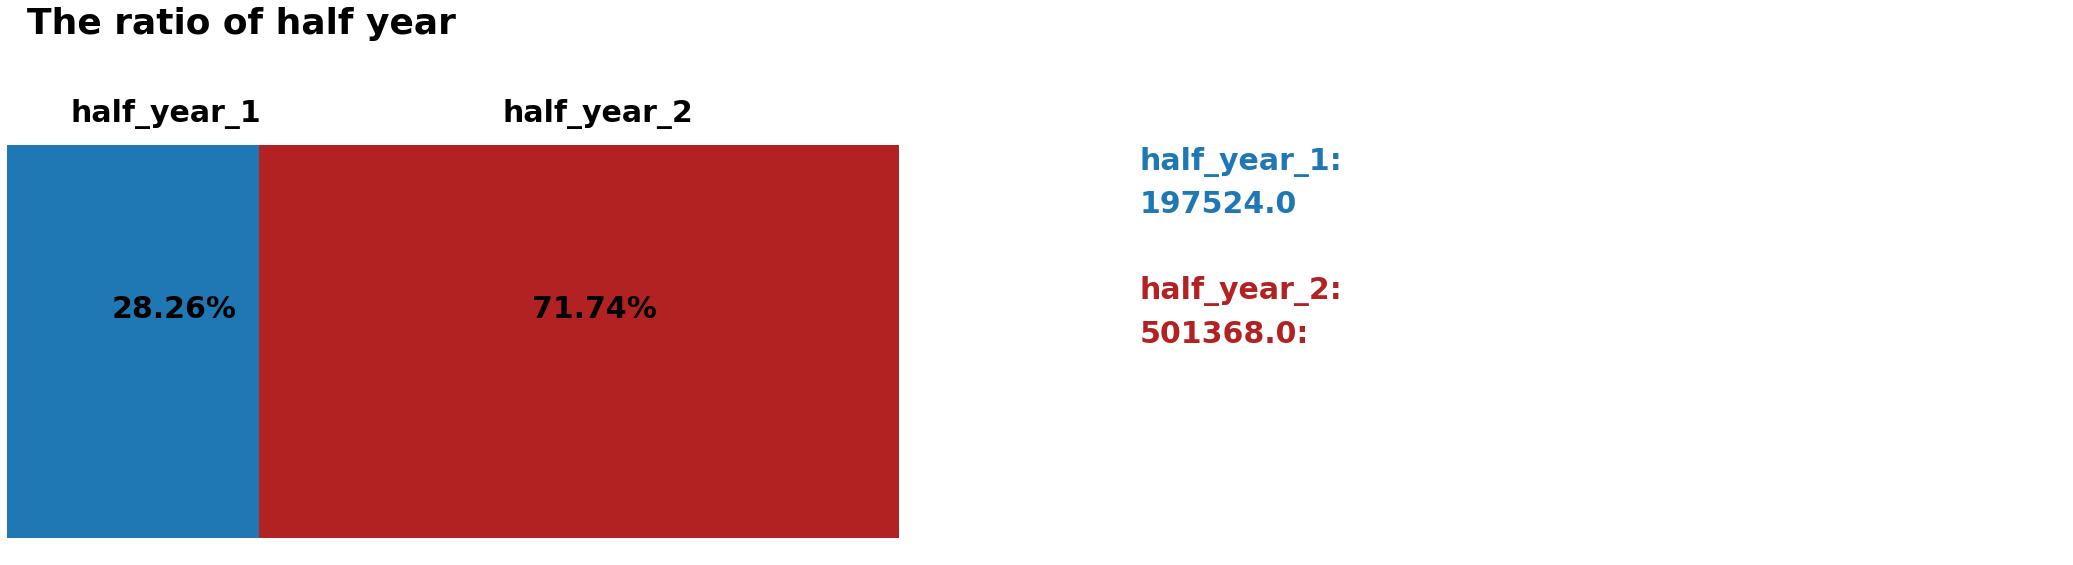

In [69]:
# lists
seasons = []
half_years = []

# cycles
for i in df['month']:
    if i in ['Dec', 'Jan', 'Feb']:
        season = 'winter'
    elif i in ['March', 'Apr', 'May']:
        season = 'spring'
    elif i in ['June', 'July', 'Aug']:
        season = 'summer'
    else:
        season = 'autumn'
    seasons.append(season)

for i in df['month']:
    if i in ['Jan', 'Feb', 'March', 'Apr', 'May', 'June']:
        half_year = 'half_year_1'
    else:
        half_year = 'half_year_2'
    half_years.append(half_year)

# columns
df['season'] = seasons
df['half_year'] = half_years

# calculations
goup_by_half_year = df \
    .groupby('half_year', as_index = False) \
    .agg({'number' : 'sum'}) 
goup_by_half_year['percentage'] = round(goup_by_half_year['number'] / sum(goup_by_half_year['number']) * 100, 2)

# fig
fig = plt.figure(figsize = (13, 6))
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 1, 1])

# barh
ax1.barh(width = goup_by_half_year['percentage'][0] + goup_by_half_year['percentage'][1], y = 0, color = 'firebrick')
ax1.barh(width = goup_by_half_year['percentage'][0], y = 0)

# group_name
ax1.text((goup_by_half_year['percentage'][0] + goup_by_half_year['percentage'][1])/14, 0.45, f"{goup_by_half_year['half_year'][0]}", color = 'black', fontsize = 30, fontweight = 'bold')
ax1.text((goup_by_half_year['percentage'][0] + goup_by_half_year['percentage'][1])/1.8, 0.45, f"{goup_by_half_year['half_year'][1]}", color = 'black', fontsize = 30, fontweight = 'bold')

# # group_percentage
ax1.text((goup_by_half_year['percentage'][0] + goup_by_half_year['percentage'][1])/8.5, 0.05, f"{goup_by_half_year['percentage'][0]}%", color = 'black', fontsize = 30, fontweight = 'bold')
ax1.text((goup_by_half_year['percentage'][0] + goup_by_half_year['percentage'][1])/1.7, 0.05, f"{goup_by_half_year['percentage'][1]}%", color = 'black', fontsize = 30, fontweight = 'bold')

# # absolute_values
ax2.text(0.01, 0.9, f"{goup_by_half_year['half_year'][0]}:", color = '#1f77b4', fontsize = 30, fontweight = 'bold')
ax2.text(0.01, 0.8, f"{goup_by_half_year['number'][0]}", color = '#1f77b4', fontsize = 30, fontweight = 'bold')
ax2.text(0.01, 0.6, f"{goup_by_half_year['half_year'][1]}:", color = 'firebrick', fontsize = 30, fontweight = 'bold')
ax2.text(0.01, 0.5, f"{goup_by_half_year['number'][1]}:", color = 'firebrick', fontsize = 30, fontweight = 'bold')

# # axis
ax1.axis('off')
ax2.axis('off')

# # title
plt.title('The ratio of half year', x = -0.95,  y = 1.2, color = 'black', fontsize = 36, fontweight = 'bold')

plt.show()

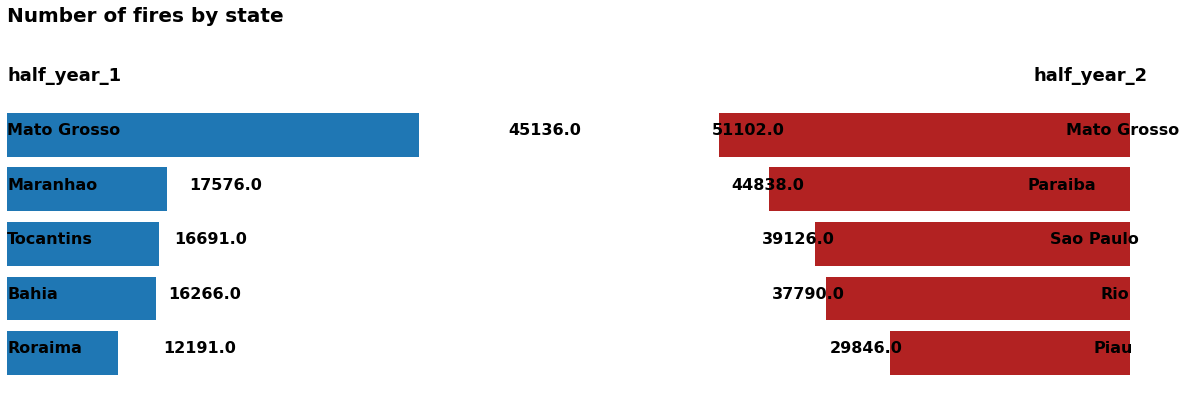

In [70]:
# calculations
half_year_1 = df \
    .query("half_year == 'half_year_1'")
half_year_1_by_state = half_year_1 \
    .groupby('state', as_index = False) \
    .agg({'number' : 'sum'}) \
    .sort_values('number', ascending = True) \
    .reset_index() \
    .drop('index', axis = 1)
half_year_2 = df \
    .query("half_year == 'half_year_2'")
half_year_2_by_state = half_year_2 \
    .groupby('state', as_index = False) \
    .agg({'number' : 'sum'}) \
    .sort_values('number', ascending = True) \
    .reset_index() \
    .drop('index', axis = 1)

# viz
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.6, 0, 1, 1])

# chart
ax1.barh(y = half_year_1_by_state['state'][18:], width = half_year_1_by_state['number'][18:])
ax2.barh(y = half_year_2_by_state['state'][18:], width = -half_year_2_by_state['number'][18:], color = 'firebrick')

# annotate_1
ax1.text(0, 4, f"{half_year_1_by_state['state'][22]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax1.text(55000, 4, f"{half_year_1_by_state['number'][22]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax1.text(0, 3, f"{half_year_1_by_state['state'][21]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax1.text(20000, 3, f"{half_year_1_by_state['number'][21]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax1.text(0, 2, f"{half_year_1_by_state['state'][20]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax1.text(18300, 2, f"{half_year_1_by_state['number'][20]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax1.text(0, 1, f"{half_year_1_by_state['state'][19]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax1.text(17700, 1, f"{half_year_1_by_state['number'][19]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax1.text(0, 0, f"{half_year_1_by_state['state'][18]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax1.text(17100, 0, f"{half_year_1_by_state['number'][18]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax1.text(0, 5, 'half_year_1', color = 'black', fontweight = 'bold', fontsize = 18)

# annotate_2
ax2.text(-8000, 4, f"{half_year_2_by_state['state'][22]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax2.text(-52000, 4, f"{half_year_2_by_state['number'][22]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax2.text(-12750, 3, f"{half_year_2_by_state['state'][21]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax2.text(-49600, 3, f"{half_year_2_by_state['number'][21]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax2.text(-9950, 2, f"{half_year_2_by_state['state'][20]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax2.text(-45800, 2, f"{half_year_2_by_state['number'][20]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax2.text(-3700, 1, f"{half_year_2_by_state['state'][19]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax2.text(-44500, 1, f"{half_year_2_by_state['number'][19]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax2.text(-4600, 0, f"{half_year_2_by_state['state'][18]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax2.text(-37300, 0, f"{half_year_2_by_state['number'][18]}", color = 'black', fontweight = 'bold', fontsize = 16)
ax2.text(-12000, 5, 'half_year_2', color = 'black', fontweight = 'bold', fontsize = 18)

# ticks
ax1.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)
ax2.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)
ax1.axis('off')
ax2.axis('off')

# title
ax1.set_title('Number of fires by state', x = 0.32, y = 1.25, color = 'black', fontsize = 20, fontweight = 'bold')

plt.show()

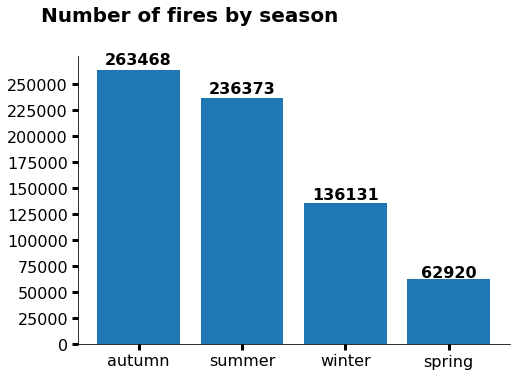

In [71]:
# calculations
group_by_season = df \
    .groupby('season', as_index = False) \
    .agg({'number' : 'sum'}) \
    .sort_values('number', ascending = False)

# viz
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# chart
ax.bar(x = group_by_season['season'], height = group_by_season['number'])

# axis
sns.despine()

# annotate
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center', color = 'black', fontsize = 16, fontweight = 'bold') 

# ticks
plt.yticks(range(0, 250001, 25000))
plt.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)

# title
plt.title('Number of fires by season', x = 0.26, y = 1.1, color = 'black', fontsize = 20, fontweight = 'bold')

plt.show()

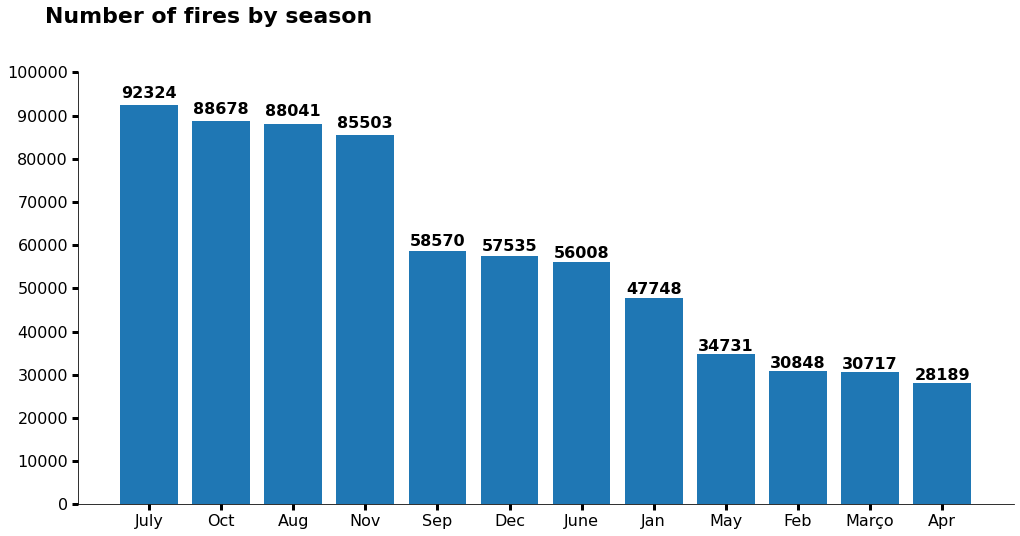

In [72]:
# calculations
group_by_month = df \
    .groupby('month', as_index = False) \
    .agg({'number' : 'sum'}) \
    .sort_values('number', ascending = False)

# viz
fig = plt.figure(figsize = (13,6))
ax = fig.add_axes([0, 0, 1, 1])

# chart
ax.bar(x = group_by_month['month'], height = group_by_month['number'])

# axis
sns.despine()

# annotate
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center', color = 'black', fontsize = 16, fontweight = 'bold') 

# ticks
plt.yticks(range(0, 100001, 10000))
plt.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)

# title
plt.title('Number of fires by season', x = 0.14, y = 1.1, color = 'black', fontsize = 22, fontweight = 'bold')

plt.show()